In [1]:
# Load libraries
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np



import warnings
warnings.filterwarnings('ignore')


pd.set_option("display.max_columns",500)
pd.set_option("display.max_rows",500)

In [2]:
import hvplot.pandas

In [3]:
# load dataset
df = pd.read_csv("Employee_Attrition.csv", header = 0)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.920786,Yes,Travel_Rarely,990.110009,Sales,1.016716,1.770313,Life Sciences,1.033298,1.054148,2.146294,Male,93.827486,3.426960,2.464492,Sales Executive,3.397665,Single,6438.949336,20845.103714,7.077818,Y,Yes,9.898765,2.844897,1.012832,95.612654,0.000000,8.063833,0.000000,1.052104,5.795945,3.993896,0.000000,4.594972
1,51.589037,No,Travel_Frequently,276.776030,Research & Development,NaN,1.035333,Life Sciences,0.944859,2.107031,3.470803,Male,52.304157,1.813458,1.788697,Research Scientist,1.584059,Married,4457.659622,24877.898697,1.114423,Y,No,NaN,4.120281,4.312008,85.370868,1.104642,8.965059,3.264952,2.526470,10.070232,7.937505,1.032295,5.901207
2,33.131540,Yes,Travel_Rarely,1204.158501,Research & Development,2.198662,2.118801,Other,0.810809,4.008125,3.979420,Male,87.271332,1.877226,0.833488,Laboratory Technician,3.301009,Single,2124.545220,2262.942954,5.539591,Y,Yes,15.401596,2.781168,2.332558,76.248084,0.000000,8.427238,3.004521,2.924784,0.000000,0.000000,0.000000,0.000000
3,34.707073,No,Travel_Frequently,1352.752432,Sales,2.937851,3.670674,Life Sciences,0.822976,4.587269,3.734705,Female,56.378982,2.932646,1.095372,Research Scientist,3.220844,Married,2771.699080,27189.905714,0.772793,NaN,Yes,9.757546,2.769576,3.029591,75.888697,0.000000,7.662606,2.856001,3.117053,8.435324,5.563667,2.845429,0.000000
4,24.790188,No,Travel_Rarely,485.053333,Research & Development,1.988953,1.120496,Medical,NaN,7.228740,1.079412,Male,40.433887,3.117739,0.937746,Laboratory Technician,1.697330,Married,3254.601575,17675.541599,10.118125,NaN,NaN,11.920147,3.282183,NaN,72.670937,0.953012,6.241733,2.814719,3.112317,2.040124,1.970786,2.495949,2.219353


In [5]:
df.shape

(1470, 35)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1323 non-null   float64
 1   Attrition                 1323 non-null   object 
 2   BusinessTravel            1323 non-null   object 
 3   DailyRate                 1323 non-null   float64
 4   Department                1323 non-null   object 
 5   DistanceFromHome          1323 non-null   float64
 6   Education                 1323 non-null   float64
 7   EducationField            1323 non-null   object 
 8   EmployeeCount             1323 non-null   float64
 9   EmployeeNumber            1323 non-null   float64
 10  EnvironmentSatisfaction   1323 non-null   float64
 11  Gender                    1323 non-null   object 
 12  HourlyRate                1323 non-null   float64
 13  JobInvolvement            1323 non-null   float64
 14  JobLevel

In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000,1323.000000
mean,36.635268,802.030050,9.091097,2.923447,0.999325,1026.679166,2.726443,65.647722,2.743028,2.058270,2.715272,6544.718401,14364.334764,2.654394,15.295717,3.149344,2.720431,80.241313,0.814757,11.426152,2.811756,2.762825,6.933624,4.233363,2.160710,4.117695
std,9.882161,414.031025,8.177870,1.072203,0.099656,610.480802,1.129679,21.469709,0.765568,1.127018,1.146786,4766.580903,7269.420895,2.508952,3.995702,0.476027,1.115959,8.022535,0.863076,8.075870,1.329044,0.761802,6.046798,3.658111,3.221481,3.594053
min,14.544608,86.828045,0.750112,0.770362,0.628985,1.054148,0.759655,23.855272,0.722008,0.715172,0.724192,891.481007,1567.502382,0.000000,7.684723,2.116951,0.720696,53.793059,0.000000,0.000000,0.000000,0.799138,0.000000,0.000000,0.000000,0.000000
25%,29.624982,456.479553,2.147069,2.122706,0.931146,501.854842,1.894818,47.701897,2.177638,1.045228,1.846039,2961.844066,8138.576694,0.948843,12.195197,2.845502,1.909010,74.882946,0.000000,5.953221,1.967328,2.193390,2.673269,1.824392,0.000000,1.687177
50%,34.951950,782.958705,6.920808,3.015658,0.998949,1022.025017,2.887313,64.934490,2.859143,1.936150,2.895032,4957.070475,14258.293365,1.708812,14.495151,3.064551,2.891235,80.351400,0.913651,9.306742,2.690934,2.899807,5.422160,2.968874,0.967140,2.939240
75%,42.748741,1130.577949,13.584900,3.700560,1.067371,1533.811096,3.676600,83.038355,3.179128,2.609707,3.676663,8268.002496,20322.279885,3.959710,17.745736,3.335525,3.639961,85.664169,1.082523,15.324548,3.366949,3.206117,9.238005,7.052591,2.586631,6.987964
max,69.402515,1784.394456,33.684424,6.285161,1.290613,2530.919375,5.254672,123.200439,5.241968,5.942269,5.251277,22858.020388,32751.715800,10.855733,29.797261,5.013371,5.092280,107.378705,3.474319,47.641892,7.503201,4.856086,36.848408,19.091844,17.273662,19.976003


In [8]:
df.isnull().sum()

Age                         147
Attrition                   147
BusinessTravel              147
DailyRate                   147
Department                  147
DistanceFromHome            147
Education                   147
EducationField              147
EmployeeCount               147
EmployeeNumber              147
EnvironmentSatisfaction     147
Gender                      147
HourlyRate                  147
JobInvolvement              147
JobLevel                    147
JobRole                     147
JobSatisfaction             147
MaritalStatus               147
MonthlyIncome               147
MonthlyRate                 147
NumCompaniesWorked          147
Over18                      147
OverTime                    147
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StandardHours               147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtC

In [9]:
df.duplicated().sum()

0

In [10]:
df=df.round(0)

Rounded up all the values because they were float

In [11]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,42.0,Yes,Travel_Rarely,990.0,Sales,1.0,2.0,Life Sciences,1.0,1.0,2.0,Male,94.0,3.0,2.0,Sales Executive,3.0,Single,6439.0,20845.0,7.0,Y,Yes,10.0,3.0,1.0,96.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,52.0,No,Travel_Frequently,277.0,Research & Development,NaN,1.0,Life Sciences,1.0,2.0,3.0,Male,52.0,2.0,2.0,Research Scientist,2.0,Married,4458.0,24878.0,1.0,Y,No,NaN,4.0,4.0,85.0,1.0,9.0,3.0,3.0,10.0,8.0,1.0,6.0
2,33.0,Yes,Travel_Rarely,1204.0,Research & Development,2.0,2.0,Other,1.0,4.0,4.0,Male,87.0,2.0,1.0,Laboratory Technician,3.0,Single,2125.0,2263.0,6.0,Y,Yes,15.0,3.0,2.0,76.0,0.0,8.0,3.0,3.0,0.0,0.0,0.0,0.0
3,35.0,No,Travel_Frequently,1353.0,Sales,3.0,4.0,Life Sciences,1.0,5.0,4.0,Female,56.0,3.0,1.0,Research Scientist,3.0,Married,2772.0,27190.0,1.0,NaN,Yes,10.0,3.0,3.0,76.0,0.0,8.0,3.0,3.0,8.0,6.0,3.0,0.0
4,25.0,No,Travel_Rarely,485.0,Research & Development,2.0,1.0,Medical,NaN,7.0,1.0,Male,40.0,3.0,1.0,Laboratory Technician,2.0,Married,3255.0,17676.0,10.0,NaN,NaN,12.0,3.0,NaN,73.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1323 non-null   float64
 1   Attrition                 1323 non-null   object 
 2   BusinessTravel            1323 non-null   object 
 3   DailyRate                 1323 non-null   float64
 4   Department                1323 non-null   object 
 5   DistanceFromHome          1323 non-null   float64
 6   Education                 1323 non-null   float64
 7   EducationField            1323 non-null   object 
 8   EmployeeCount             1323 non-null   float64
 9   EmployeeNumber            1323 non-null   float64
 10  EnvironmentSatisfaction   1323 non-null   float64
 11  Gender                    1323 non-null   object 
 12  HourlyRate                1323 non-null   float64
 13  JobInvolvement            1323 non-null   float64
 14  JobLevel

In [13]:
df['Department'].replace('Human Resources ', 0, inplace= True)
df['Department'].replace('Sales', 1, inplace= True)
df['Department'].replace('Research & Development', 2, inplace= True)
df['EducationField'].replace('Human Resources', 0, inplace= True)
df['EducationField'].replace('Life Sciences', 1, inplace= True)
df['EducationField'].replace('Marketing', 2, inplace= True)
df['EducationField'].replace('Medical', 3, inplace= True)
df['EducationField'].replace('Other', 4, inplace= True)
df['EducationField'].replace('Technical Degree', 5, inplace= True)
df['Gender'].replace('Male', 1, inplace= True)
df['Gender'].replace('Female', 0, inplace= True)
df['JobRole'].replace('Healthcare Representative', 0, inplace= True)
df['JobRole'].replace('Laboratory Technician', 1, inplace= True)
df['JobRole'].replace('Manager', 2, inplace= True)
df['JobRole'].replace('Manufacturing Director', 3, inplace= True)
df['JobRole'].replace('Research Director', 4, inplace= True)
df['JobRole'].replace('Research Scientist', 5, inplace= True)
df['MaritalStatus'].replace('Divorced', 0, inplace= True)
df['MaritalStatus'].replace('Married', 1, inplace= True)
df['MaritalStatus'].replace('Single', 2, inplace= True)
df['Over18'].replace('Yes', 1, inplace= True)

In [14]:
for column in df.columns:
    print(f"{column}: Number of unique values {df[column].nunique()}")
    print(" ")

Age: Number of unique values 53
 
Attrition: Number of unique values 2
 
BusinessTravel: Number of unique values 3
 
DailyRate: Number of unique values 866
 
Department: Number of unique values 3
 
DistanceFromHome: Number of unique values 33
 
Education: Number of unique values 6
 
EducationField: Number of unique values 6
 
EmployeeCount: Number of unique values 1
 
EmployeeNumber: Number of unique values 992
 
EnvironmentSatisfaction: Number of unique values 5
 
Gender: Number of unique values 2
 
HourlyRate: Number of unique values 94
 
JobInvolvement: Number of unique values 5
 
JobLevel: Number of unique values 6
 
JobRole: Number of unique values 9
 
JobSatisfaction: Number of unique values 5
 
MaritalStatus: Number of unique values 3
 
MonthlyIncome: Number of unique values 1246
 
MonthlyRate: Number of unique values 1287
 
NumCompaniesWorked: Number of unique values 12
 
Over18: Number of unique values 1
 
OverTime: Number of unique values 2
 
PercentSalaryHike: Number of uniq

In [15]:
df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis="columns", inplace=True)

the dropped features aren't useful because have only 1 unique value and employee number is individual so Im going to dro it

In [16]:
df.isnull().values.any()

True

In [17]:
df.isnull().sum()

Age                         147
Attrition                   147
BusinessTravel              147
DailyRate                   147
Department                  147
DistanceFromHome            147
Education                   147
EducationField              147
EnvironmentSatisfaction     147
Gender                      147
HourlyRate                  147
JobInvolvement              147
JobLevel                    147
JobRole                     147
JobSatisfaction             147
MaritalStatus               147
MonthlyIncome               147
MonthlyRate                 147
NumCompaniesWorked          147
OverTime                    147
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtCompany              147
YearsInCurrentRole          147
YearsSinceLastPromotion     147
YearsWithCurrManager        147
dtype: i

In [18]:
df.shape

(1470, 31)

In [19]:
object_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {df[column].unique()}")
        print(df[column].value_counts())
        print(" ")

object_col.remove('Attrition')

Attrition : ['Yes' 'No' nan]
Attrition
No     1065
Yes     258
Name: count, dtype: int64
 
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' nan 'Non-Travel']
BusinessTravel
Travel_Rarely        890
Travel_Frequently    279
Non-Travel           154
Name: count, dtype: int64
 
Department : [1 2 nan 'Human Resources']
Department
2                  824
1                  393
Human Resources    106
Name: count, dtype: int64
 
JobRole : ['Sales Executive' 5 1 nan 0 3 2 'Sales Representative' 4
 'Human Resources']
JobRole
Sales Executive         281
5                       257
1                       229
3                       122
0                       118
2                       101
4                        80
Sales Representative     75
Human Resources          60
Name: count, dtype: int64
 
OverTime : ['Yes' 'No' nan]
OverTime
No     929
Yes    394
Name: count, dtype: int64
 


In [20]:
len(object_col)

4

In [21]:
label = LabelEncoder()
df["Attrition"] = label.fit_transform(df.Attrition)

In [22]:
disc_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() < 30:
        print(f"{column} : {df[column].unique()}")
        disc_col.append(column)
        print(" ")
disc_col.remove('Attrition')

Attrition : [1 0 2]
 
Education : [ 2.  1.  4. nan  3.  5.  6.]
 
EducationField : [ 1.  4.  3.  5. nan  2.  0.]
 
EnvironmentSatisfaction : [ 2.  3.  4.  1. nan  5.]
 
Gender : [ 1.  0. nan]
 
JobInvolvement : [ 3.  2.  4.  5. nan  1.]
 
JobLevel : [ 2.  1.  3. nan  4.  5.  6.]
 
JobSatisfaction : [ 3.  2. nan  5.  1.  4.]
 
MaritalStatus : [ 2.  1.  0. nan]
 
NumCompaniesWorked : [ 7.  1.  6. 10.  0.  4.  2.  5. nan  3.  9.  8. 11.]
 
PercentSalaryHike : [10. nan 15. 12. 13. 19. 21. 11. 17.  8. 23. 20. 14. 16.  9. 24. 18. 22.
 28. 25. 27. 26. 29. 30.]
 
PerformanceRating : [ 3.  4.  2. nan  5.]
 
RelationshipSatisfaction : [ 1.  4.  2.  3. nan  5.]
 
StockOptionLevel : [ 0.  1.  3.  2. nan]
 
TrainingTimesLastYear : [ 0.  3.  2. nan  5.  1.  4.  6.  7.  8.]
 
WorkLifeBalance : [ 1.  3.  2. nan  5.  4.]
 
YearsInCurrentRole : [ 4.  8.  0.  6.  2. nan  7.  3. 14.  1. 15.  5. 13. 12. 10. 11.  9. 17.
 18. 16. 19.]
 
YearsSinceLastPromotion : [ 0.  1.  3.  2. nan  4.  8.  7.  5. 17.  9.  

In [23]:
cont_col = []
for column in df.columns:
    if df[column].dtypes != object and df[column].nunique() > 30:
        print(f"{column} : Minimum: {df[column].min()}, Maximum: {df[column].max()}")
        cont_col.append(column)
        print(" ")

Age : Minimum: 15.0, Maximum: 69.0
 
DailyRate : Minimum: 87.0, Maximum: 1784.0
 
DistanceFromHome : Minimum: 1.0, Maximum: 34.0
 
HourlyRate : Minimum: 24.0, Maximum: 123.0
 
MonthlyIncome : Minimum: 891.0, Maximum: 22858.0
 
MonthlyRate : Minimum: 1568.0, Maximum: 32752.0
 
TotalWorkingYears : Minimum: 0.0, Maximum: 48.0
 
YearsAtCompany : Minimum: 0.0, Maximum: 37.0
 


In [24]:
df.hvplot.hist(y='DistanceFromHome', by='Attrition', subplots=False, width=600, height=300, bins=30)


:NdOverlay   [Attrition]
   :Histogram   [DistanceFromHome]   (DistanceFromHome_count)

In [25]:
df.hvplot.hist(y='Education', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [Education]   (Education_count)

In [26]:
df.hvplot.hist(y='RelationshipSatisfaction', by='Attrition', subplots=False, width=600, height=300)


:NdOverlay   [Attrition]
   :Histogram   [RelationshipSatisfaction]   (RelationshipSatisfaction_count)

In [27]:
df.hvplot.hist(y='EnvironmentSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [EnvironmentSatisfaction]   (EnvironmentSatisfaction_count)

In [28]:
df.hvplot.hist(y='JobInvolvement', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobInvolvement]   (JobInvolvement_count)

In [29]:
df.hvplot.hist(y='JobLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobLevel]   (JobLevel_count)

In [30]:
df.hvplot.hist(y='JobSatisfaction', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [JobSatisfaction]   (JobSatisfaction_count)

In [31]:
df.hvplot.hist(y='NumCompaniesWorked', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [NumCompaniesWorked]   (NumCompaniesWorked_count)

In [32]:
df.hvplot.hist(y='PercentSalaryHike', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [PercentSalaryHike]   (PercentSalaryHike_count)

In [33]:
df.hvplot.hist(y='StockOptionLevel', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [StockOptionLevel]   (StockOptionLevel_count)

In [34]:
df.hvplot.hist(y='TrainingTimesLastYear', by='Attrition', subplots=False, width=600, height=300)

:NdOverlay   [Attrition]
   :Histogram   [TrainingTimesLastYear]   (TrainingTimesLastYear_count)

In [35]:
df.hvplot.hist(y='Age', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [Age]   (Age_count)

In [36]:
df.hvplot.hist(y='MonthlyIncome', by='Attrition', subplots=False, width=600, height=300, bins=50)

:NdOverlay   [Attrition]
   :Histogram   [MonthlyIncome]   (MonthlyIncome_count)

In [37]:
df.hvplot.hist(y='YearsAtCompany', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [YearsAtCompany]   (YearsAtCompany_count)

In [38]:
df.hvplot.hist(y='TotalWorkingYears', by='Attrition', subplots=False, width=600, height=300, bins=35)

:NdOverlay   [Attrition]
   :Histogram   [TotalWorkingYears]   (TotalWorkingYears_count)

When JobLevel. MonthlyIncome and YearAtCompany are lower those employees are more likely to quit there jobs.
BusinessTravel : The workers who travel alot are more likely to quit then other employees.

Department : The worker in Research & Development are more likely to stay then the workers on other departement.

EducationField : The workers with Human Resources and Technical Degree are more likely to quit then employees from other fields of educations.

Gender : The Male are more likely to quit.

JobRole : The workers in Laboratory Technician, Sales Representative, and Human Resources are more likely to quit the workers in other positions.

MaritalStatus : The workers who have Single marital status are more likely to quit the Married, and Divorced.

OverTime : The workers who work more hours are likely to quit then others.

In [39]:
df.isnull().sum()

Age                         147
Attrition                     0
BusinessTravel              147
DailyRate                   147
Department                  147
DistanceFromHome            147
Education                   147
EducationField              147
EnvironmentSatisfaction     147
Gender                      147
HourlyRate                  147
JobInvolvement              147
JobLevel                    147
JobRole                     147
JobSatisfaction             147
MaritalStatus               147
MonthlyIncome               147
MonthlyRate                 147
NumCompaniesWorked          147
OverTime                    147
PercentSalaryHike           147
PerformanceRating           147
RelationshipSatisfaction    147
StockOptionLevel            147
TotalWorkingYears           147
TrainingTimesLastYear       147
WorkLifeBalance             147
YearsAtCompany              147
YearsInCurrentRole          147
YearsSinceLastPromotion     147
YearsWithCurrManager        147
dtype: i

In [40]:
for column in df.columns:
    if df[column].dtype == 'O':  # Check if the column has object (string) dtype
        df[column] = pd.to_numeric(df[column], errors='coerce')

print(df)


       Age  Attrition  BusinessTravel  DailyRate  Department  \
0     42.0          1             NaN      990.0         1.0   
1     52.0          0             NaN      277.0         2.0   
2     33.0          1             NaN     1204.0         2.0   
3     35.0          0             NaN     1353.0         1.0   
4     25.0          0             NaN      485.0         2.0   
...    ...        ...             ...        ...         ...   
1465  37.0          0             NaN      914.0         2.0   
1466  35.0          0             NaN      575.0         2.0   
1467  27.0          0             NaN      152.0         2.0   
1468   NaN          0             NaN      996.0         NaN   
1469  38.0          0             NaN      704.0         2.0   

      DistanceFromHome  Education  EducationField  EnvironmentSatisfaction  \
0                  1.0        2.0             1.0                      2.0   
1                  NaN        1.0             1.0                      3.0 

<Axes: >

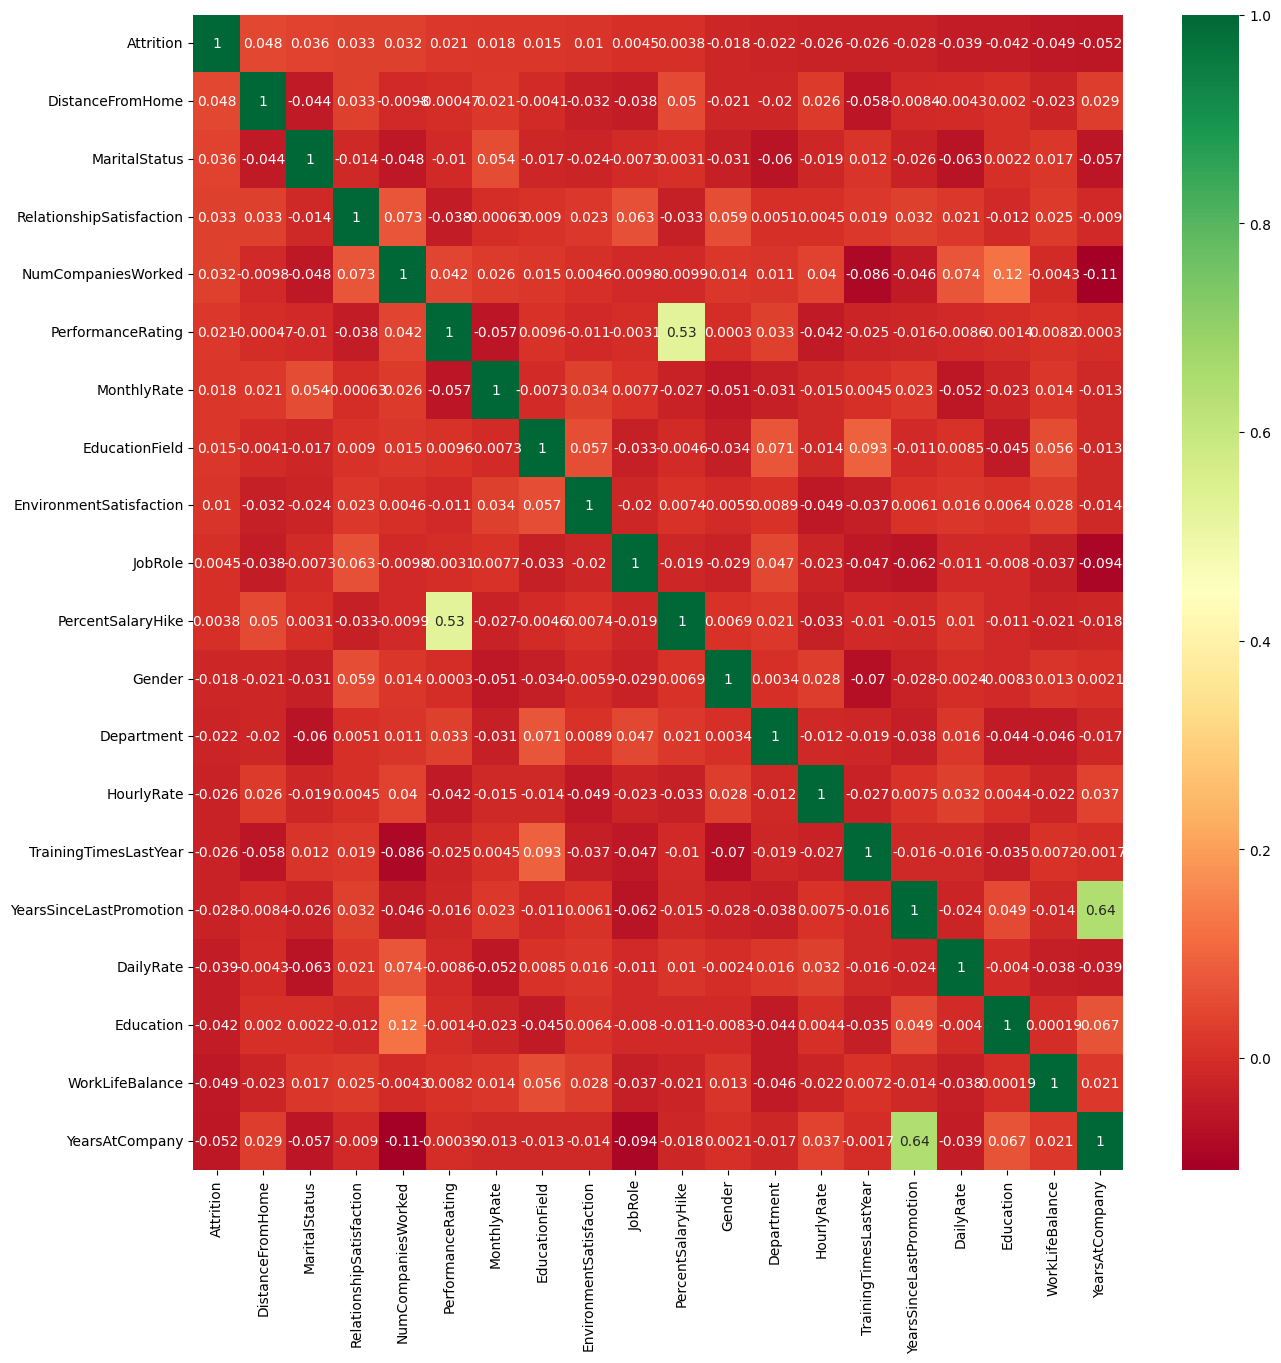

In [41]:
col = df.corr().nlargest(20, "Attrition").Attrition.index
plt.figure(figsize=(15, 15))
sns.heatmap(df[col].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":10})

In [42]:
df.drop('Attrition', axis=1).corrwith(df.Attrition).hvplot.barh()

:Bars   [index]   (0)

In [43]:
df.shape

(1470, 31)

In [44]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,42.0,1,NaN,990.0,1.0,1.0,2.0,1.0,2.0,1.0,94.0,3.0,2.0,NaN,3.0,2.0,6439.0,20845.0,7.0,NaN,10.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,52.0,0,NaN,277.0,2.0,NaN,1.0,1.0,3.0,1.0,52.0,2.0,2.0,5.0,2.0,1.0,4458.0,24878.0,1.0,NaN,NaN,4.0,4.0,1.0,9.0,3.0,3.0,10.0,8.0,1.0,6.0
2,33.0,1,NaN,1204.0,2.0,2.0,2.0,4.0,4.0,1.0,87.0,2.0,1.0,1.0,3.0,2.0,2125.0,2263.0,6.0,NaN,15.0,3.0,2.0,0.0,8.0,3.0,3.0,0.0,0.0,0.0,0.0
3,35.0,0,NaN,1353.0,1.0,3.0,4.0,1.0,4.0,0.0,56.0,3.0,1.0,5.0,3.0,1.0,2772.0,27190.0,1.0,NaN,10.0,3.0,3.0,0.0,8.0,3.0,3.0,8.0,6.0,3.0,0.0
4,25.0,0,NaN,485.0,2.0,2.0,1.0,3.0,1.0,1.0,40.0,3.0,1.0,1.0,2.0,1.0,3255.0,17676.0,10.0,NaN,12.0,3.0,NaN,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0


In [45]:
df.isnull().sum()

Age                          147
Attrition                      0
BusinessTravel              1470
DailyRate                    147
Department                   253
DistanceFromHome             147
Education                    147
EducationField               147
EnvironmentSatisfaction      147
Gender                       147
HourlyRate                   147
JobInvolvement               147
JobLevel                     147
JobRole                      563
JobSatisfaction              147
MaritalStatus                147
MonthlyIncome                147
MonthlyRate                  147
NumCompaniesWorked           147
OverTime                    1470
PercentSalaryHike            147
PerformanceRating            147
RelationshipSatisfaction     147
StockOptionLevel             147
TotalWorkingYears            147
TrainingTimesLastYear        147
WorkLifeBalance              147
YearsAtCompany               147
YearsInCurrentRole           147
YearsSinceLastPromotion      147
YearsWithC

In [46]:
df.isnull().sum()

Age                          147
Attrition                      0
BusinessTravel              1470
DailyRate                    147
Department                   253
DistanceFromHome             147
Education                    147
EducationField               147
EnvironmentSatisfaction      147
Gender                       147
HourlyRate                   147
JobInvolvement               147
JobLevel                     147
JobRole                      563
JobSatisfaction              147
MaritalStatus                147
MonthlyIncome                147
MonthlyRate                  147
NumCompaniesWorked           147
OverTime                    1470
PercentSalaryHike            147
PerformanceRating            147
RelationshipSatisfaction     147
StockOptionLevel             147
TotalWorkingYears            147
TrainingTimesLastYear        147
WorkLifeBalance              147
YearsAtCompany               147
YearsInCurrentRole           147
YearsSinceLastPromotion      147
YearsWithC

In [47]:
df.shape

(1470, 31)

In [48]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,42.0,1,NaN,990.0,1.0,1.0,2.0,1.0,2.0,1.0,94.0,3.0,2.0,NaN,3.0,2.0,6439.0,20845.0,7.0,NaN,10.0,3.0,1.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,52.0,0,NaN,277.0,2.0,NaN,1.0,1.0,3.0,1.0,52.0,2.0,2.0,5.0,2.0,1.0,4458.0,24878.0,1.0,NaN,NaN,4.0,4.0,1.0,9.0,3.0,3.0,10.0,8.0,1.0,6.0
2,33.0,1,NaN,1204.0,2.0,2.0,2.0,4.0,4.0,1.0,87.0,2.0,1.0,1.0,3.0,2.0,2125.0,2263.0,6.0,NaN,15.0,3.0,2.0,0.0,8.0,3.0,3.0,0.0,0.0,0.0,0.0
3,35.0,0,NaN,1353.0,1.0,3.0,4.0,1.0,4.0,0.0,56.0,3.0,1.0,5.0,3.0,1.0,2772.0,27190.0,1.0,NaN,10.0,3.0,3.0,0.0,8.0,3.0,3.0,8.0,6.0,3.0,0.0
4,25.0,0,NaN,485.0,2.0,2.0,1.0,3.0,1.0,1.0,40.0,3.0,1.0,1.0,2.0,1.0,3255.0,17676.0,10.0,NaN,12.0,3.0,NaN,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0
